In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/english-premier-league202021/EPL_20_21.csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
sns.set()
%matplotlib inline

In [3]:
epl = pd.read_csv("/kaggle/input/english-premier-league202021/EPL_20_21.csv")
epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

# ****NUMBER OF PLAYERS IN EACH TEAMS ROSTER 

In [5]:
player_count = epl.groupby("Club")
player_count["Name"].count()

Club
Arsenal                    29
Aston Villa                24
Brighton                   27
Burnley                    25
Chelsea                    27
Crystal Palace             24
Everton                    29
Fulham                     28
Leeds United               23
Leicester City             27
Liverpool FC               28
Manchester City            24
Manchester United          29
Newcastle United           27
Sheffield United           27
Southampton                29
Tottenham Hotspur          24
West Bromwich Albion       30
West Ham United            24
Wolverhampton Wanderers    27
Name: Name, dtype: int64

# **Age Stats**

<AxesSubplot:xlabel='Age', ylabel='Club'>

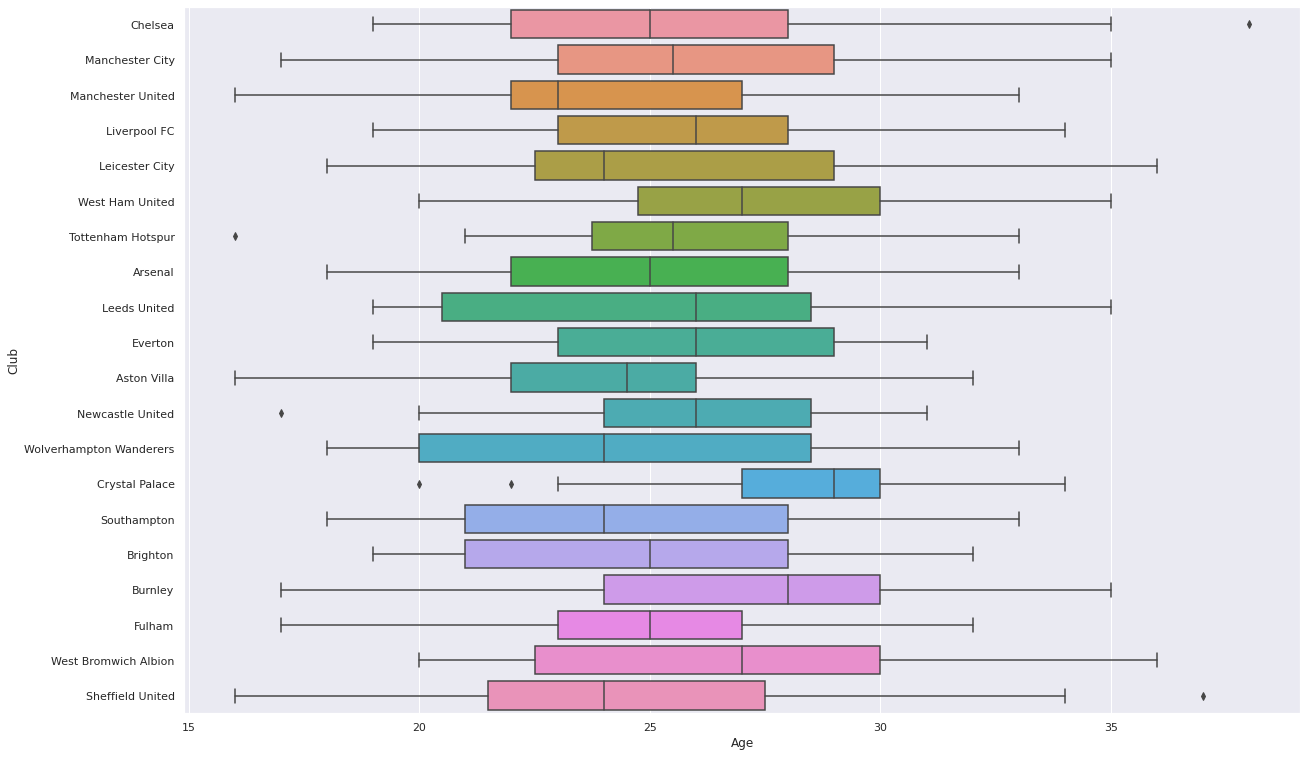

In [6]:
plt.figure(figsize=(20,13))
sns.set_theme(context='notebook',style='darkgrid')
sns.boxplot(x='Age',y='Club', data=epl)

**Youngest Players**

In [7]:
epl[epl["Age"]==epl["Age"].min()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.0,0,0
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,0,-1.0,0,0,0.00,0.0,0,0
284,Carney Chukwuemeka,Aston Villa,ENG,"FW,MF",16,2,0,20,0,0,8,62.5,0,0,0.29,0.0,0,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.0,0,0


**Oldest Player**

In [8]:
epl[epl["Age"]==epl["Age"].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
22,Willy Caballero,Chelsea,ARG,GK,38,1,1,90,0,0,26,92.3,0,0,0.0,0.0,0,0


**Average Age For Each Club**

In [9]:
clubage_ave = epl.groupby("Club")
clubage_ave["Age"].mean()

Club
Arsenal                    24.965517
Aston Villa                24.291667
Brighton                   24.555556
Burnley                    27.040000
Chelsea                    25.592593
Crystal Palace             28.333333
Everton                    25.413793
Fulham                     25.035714
Leeds United               25.347826
Leicester City             25.592593
Liverpool FC               25.571429
Manchester City            25.708333
Manchester United          23.862069
Newcastle United           26.074074
Sheffield United           24.814815
Southampton                24.137931
Tottenham Hotspur          25.625000
West Bromwich Albion       26.766667
West Ham United            27.500000
Wolverhampton Wanderers    24.444444
Name: Age, dtype: float64

# **Nationalities Represented**

In [10]:
epl['Nationality'].nunique()

59

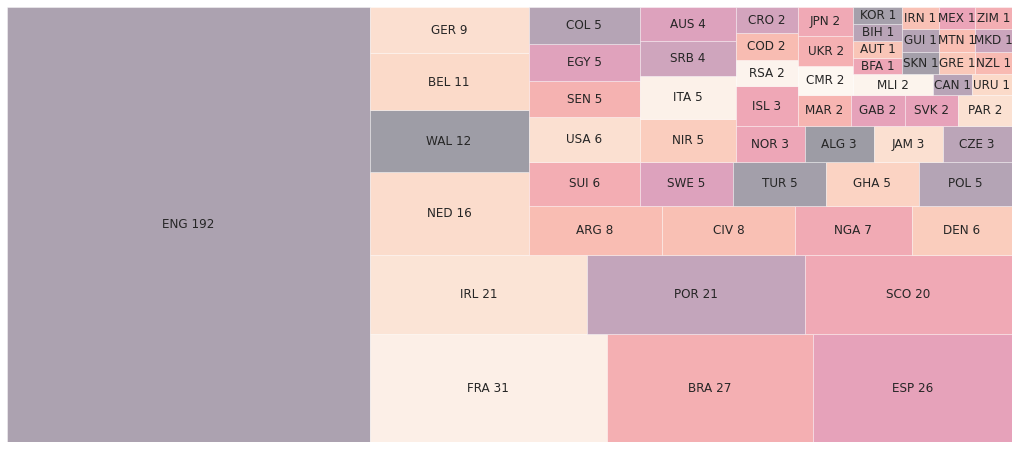

In [11]:
plt.figure(figsize=(18,8))

#list of number of players from a specific country
numbers=epl.groupby('Nationality')['Name'].count().sort_values(ascending= False).tolist() 


labels = epl.groupby('Nationality')['Name'].count().sort_values(ascending= False).index.tolist()

zipped = [x+" "+y for x, y in zip(labels, [str(i) for i in numbers])]


squarify.plot(sizes=numbers, label=zipped, alpha=0.4)
plt.axis("off")
plt.show()

# **Goals and Assists**

Text(0.5, 1.0, 'Most Goals Scored')

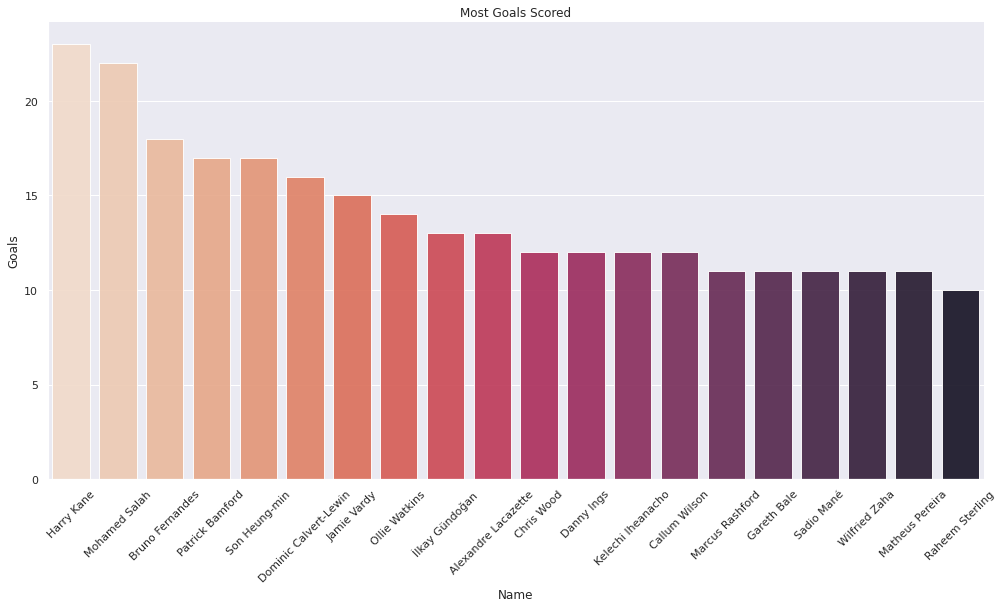

In [12]:
goalking = epl.sort_values(by=["Goals"], ascending=False)[:20]
sns.set_theme(context='notebook',style='darkgrid')
sns.catplot(x="Name", y="Goals", data=goalking, kind="bar", height=7, aspect=2, palette="rocket_r", alpha=0.9)
plt.xticks(rotation=45)
plt.title('Most Goals Scored')

Text(0.5, 1.0, 'Most Goal and Assist Contributions')

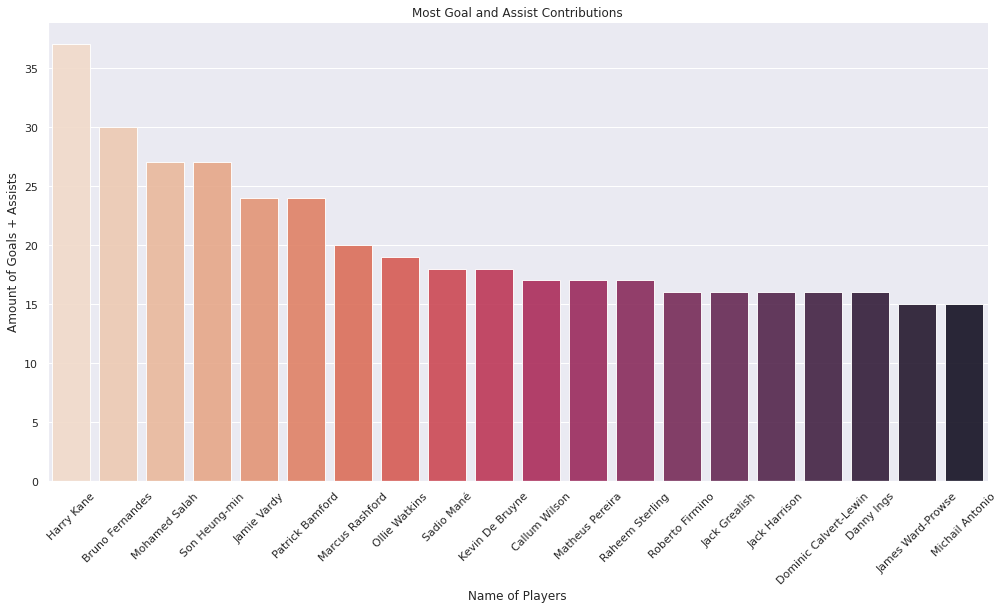

In [13]:
epl["Goalassist"] = epl["Goals"] + epl["Assists"]
sns.set_theme(context='notebook',style='darkgrid')
goal_cont = epl.sort_values(by=["Goalassist"], ascending=False)[:20]

sns.catplot(x="Name", y="Goalassist", data=goal_cont, kind="bar", height=7, aspect=2, palette="rocket_r", alpha=0.9)
plt.xticks(rotation=45)

plt.xlabel('Name of Players')
plt.ylabel('Amount of Goals + Assists')
plt.title('Most Goal and Assist Contributions')

**Most Penalty Goals in EPL**

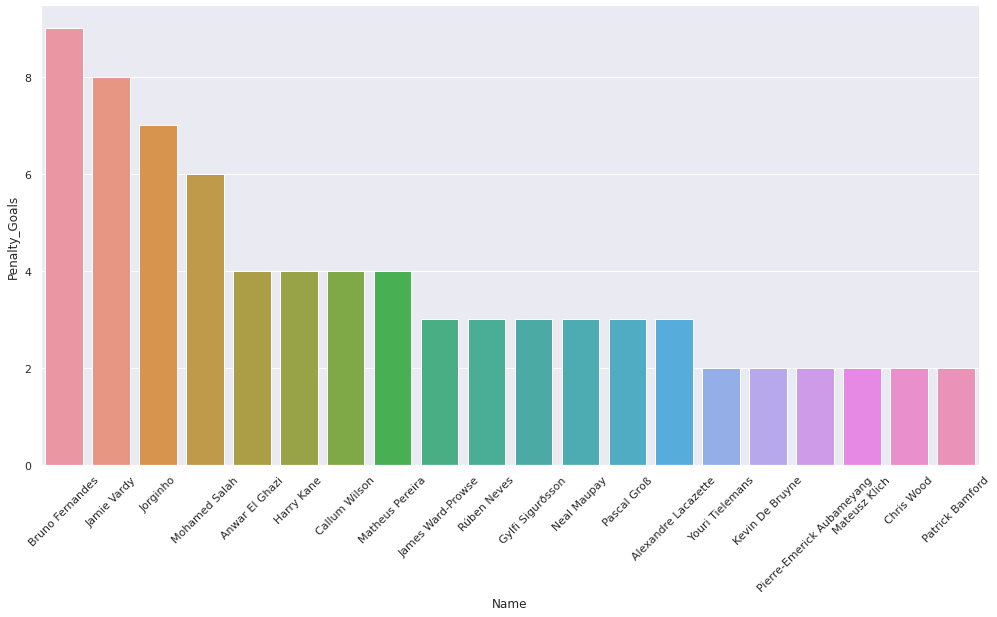

In [14]:
penal = epl.sort_values(by="Penalty_Goals", ascending=False)[:20]
sns.set_theme(context='notebook',style='darkgrid')
sns.catplot(x='Name',
    y='Penalty_Goals',
    data=penal, kind="bar"
    ,height=7, aspect=2)
plt.xticks(rotation=45)
plt.show()

# **Passing Accuracy**

In [15]:
epl.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards', 'Goalassist'],
      dtype='object')

Percentage of passes completed based on most minutes played

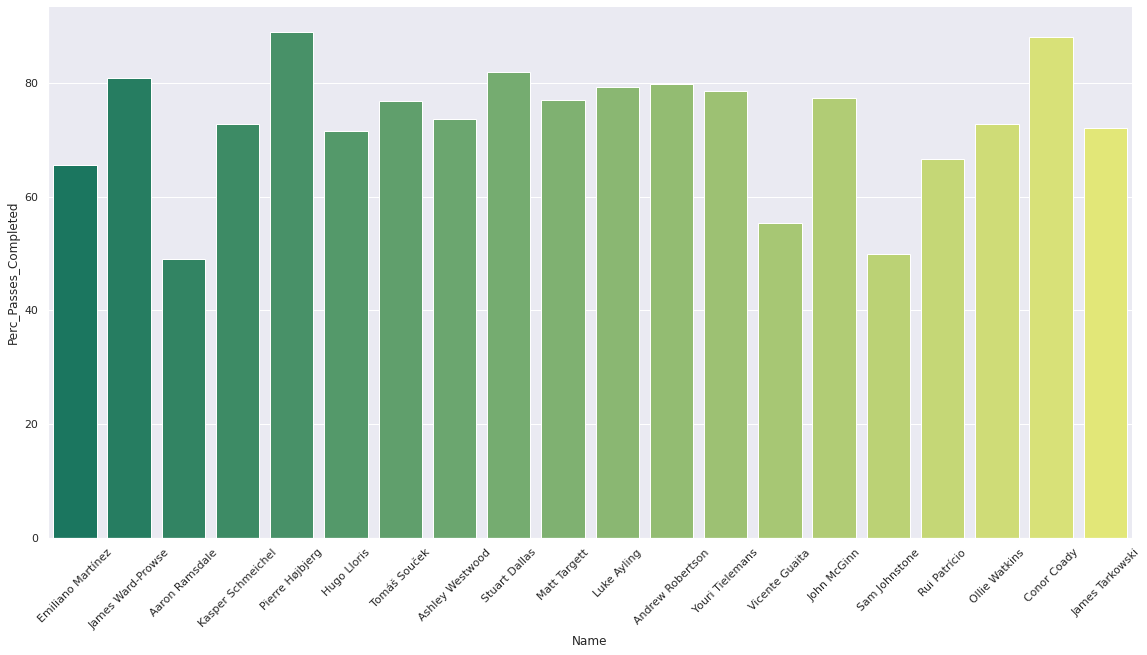

In [16]:
perc = epl.sort_values(by="Mins", ascending=False)[:20]
sns.set_theme(context='notebook',style='darkgrid')
sns.catplot(x='Name',
    y='Perc_Passes_Completed',
    data=perc, kind="bar"
    ,height=8, aspect=2, palette = "summer")
plt.xticks(rotation=45)
plt.show()

Top 20 passes attempeted

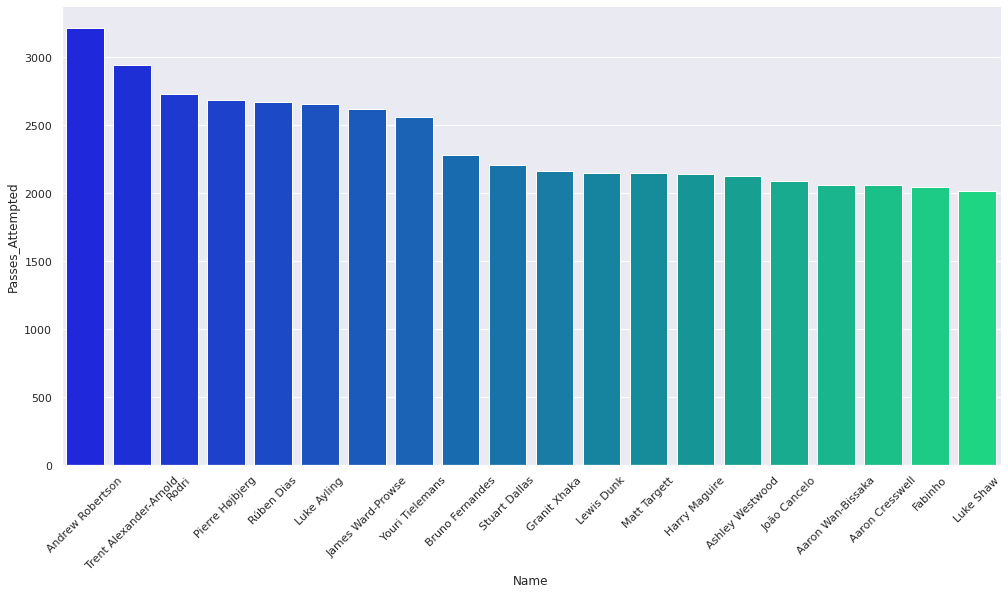

In [17]:
passperc = epl.sort_values(by="Passes_Attempted", ascending=False)[:20]
sns.set_theme(context='notebook',style='darkgrid')
sns.catplot(x='Name',
    y='Passes_Attempted',
    data=passperc, kind="bar"
    ,height=7, aspect=2, palette = "winter")
plt.xticks(rotation=45)
plt.show()

Expected goals distribution

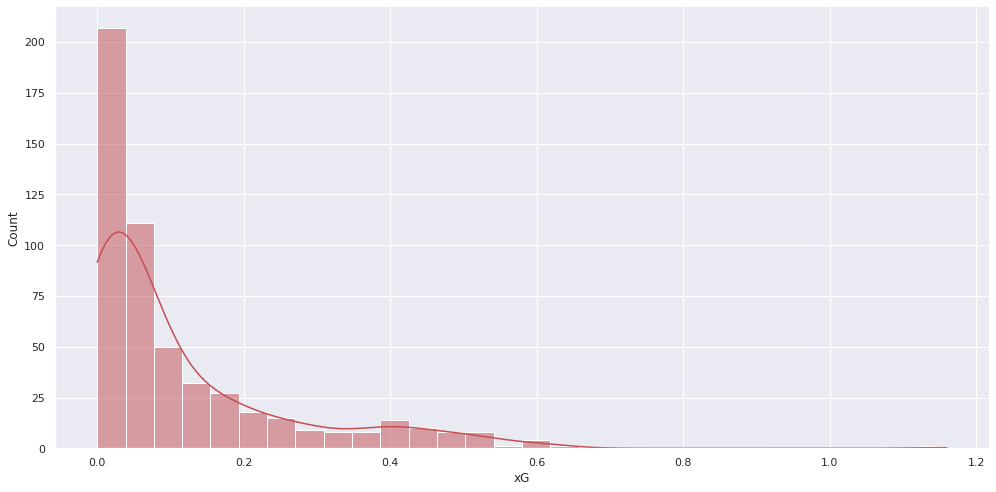

In [18]:
goalexp = epl.sort_values(by="Mins", ascending=False)
sns.displot(x=goalexp['xG'], bins=30,color='r',height=7,
    aspect=2, kde=True)
plt.show()
